In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Handling NAs using KNN

In [ ]:
from google.colab import files
files.upload()

In [3]:
df=pd.read_excel('Chapter5_Imputation_DataSet.xlsx')
df.head()

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,7913.0,64.4,0.0
1,8000.0,64.8,0.0
2,8049.0,65.2,0.0
3,8081.0,65.7,0.0
4,8132.0,66.4,0.0


In [4]:
df.isna().any()

Surface Treating Pressure     True
Slurry Rate                  False
Proppant Concentration       False
dtype: bool

In [5]:
df.isnull().sum()

Surface Treating Pressure    164
Slurry Rate                    0
Proppant Concentration         0
dtype: int64

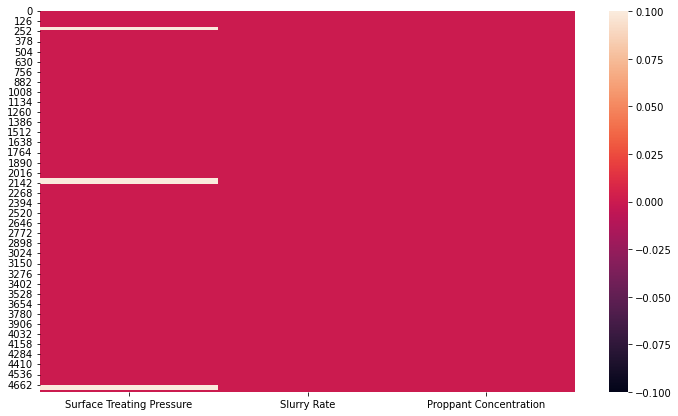

In [6]:
from seaborn.matrix import clustermap
# visuallizing missing data in method 1:

plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(), robust=True)

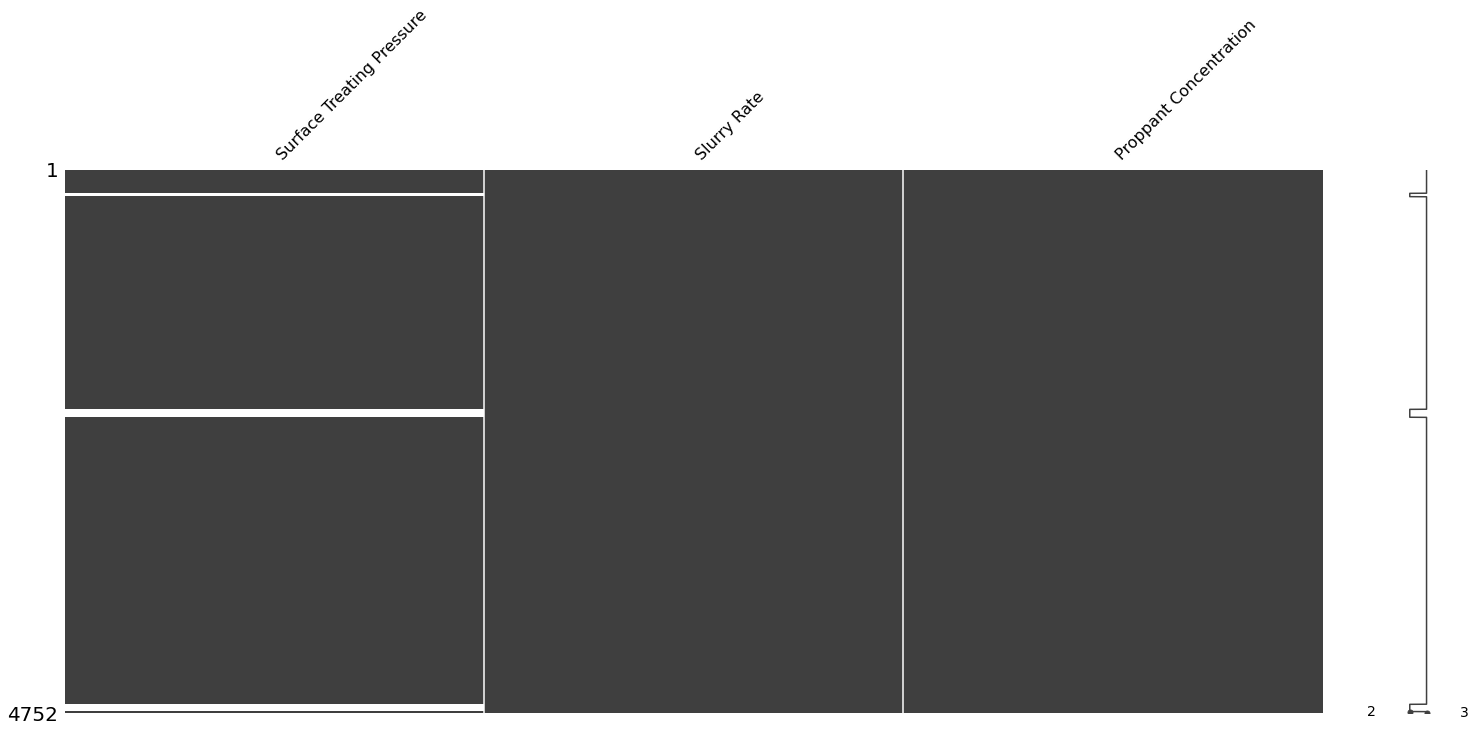

In [7]:
#method 2

msno.matrix(df)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=['Surface Treating Pressure', 	'Slurry Rate',	'Proppant Concentration'])
df_scaled.head()

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,-2.678786,-10.675047,-2.022926
1,-1.663165,-10.554120,-2.022926
2,-1.091149,-10.433193,-2.022926
3,-0.717588,-10.282035,-2.022926
4,-0.122224,-10.070413,-2.022926


In [ ]:
pip install fancyimpute

In [10]:
from sklearn.model_selection import train_test_split
x=df.drop(['Surface Treating Pressure'], axis='columns')
y=df['Surface Treating Pressure']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)


In [11]:
from sklearn.model_selection import RandomizedSearchCV
from fancyimpute import KNN
from sklearn.impute import KNNImputer


#or simply use from sklearn.impute import KNNImputer




In [12]:

xfilledknn=KNN(k=2 ).fit_transform(df_scaled)
x_filledknn=pd.DataFrame(xfilledknn,columns=['Surface Treating Pressure', 	'Slurry Rate',	'Proppant Concentration'] )
x_filledknn.head()

Imputing row 1/4752 with 0 missing, elapsed time: 3.102
Imputing row 101/4752 with 0 missing, elapsed time: 3.111
Imputing row 201/4752 with 0 missing, elapsed time: 3.111
Imputing row 301/4752 with 0 missing, elapsed time: 3.113
Imputing row 401/4752 with 0 missing, elapsed time: 3.114
Imputing row 501/4752 with 0 missing, elapsed time: 3.114
Imputing row 601/4752 with 0 missing, elapsed time: 3.115
Imputing row 701/4752 with 0 missing, elapsed time: 3.115
Imputing row 801/4752 with 0 missing, elapsed time: 3.118
Imputing row 901/4752 with 0 missing, elapsed time: 3.125
Imputing row 1001/4752 with 0 missing, elapsed time: 3.125
Imputing row 1101/4752 with 0 missing, elapsed time: 3.126
Imputing row 1201/4752 with 0 missing, elapsed time: 3.129
Imputing row 1301/4752 with 0 missing, elapsed time: 3.130
Imputing row 1401/4752 with 0 missing, elapsed time: 3.130
Imputing row 1501/4752 with 0 missing, elapsed time: 3.131
Imputing row 1601/4752 with 0 missing, elapsed time: 3.134
Imputing 

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,-2.678786,-10.675047,-2.022926
1,-1.663165,-10.554120,-2.022926
2,-1.091149,-10.433193,-2.022926
3,-0.717588,-10.282035,-2.022926
4,-0.122224,-10.070413,-2.022926


In [13]:
new_df_filled=scaler.inverse_transform(x_filledknn)
new_df_filled=pd.DataFrame(new_df_filled,columns=['Surface Treating Pressure', 	'Slurry Rate',	'Proppant Concentration'] )

In [14]:
new_df_filled.isnull().sum()

#missing data are filled 

Surface Treating Pressure    0
Slurry Rate                  0
Proppant Concentration       0
dtype: int64

# Iterative Imputer

* At each step, a feature column is selected as the model output and the remaining columns are treated as inputs

* A regression is built  based on x and y 
* This model is used to predict the y values 

In [15]:
from sklearn.impute import IterativeImputer
ii=IterativeImputer().fit_transform(df_scaled)
ii=pd.DataFrame(ii, columns=['Surface Treating Pressure', 	'Slurry Rate',	'Proppant Concentration'])
ii.head()

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,-2.678786,-10.675047,-2.022926
1,-1.663165,-10.554120,-2.022926
2,-1.091149,-10.433193,-2.022926
3,-0.717588,-10.282035,-2.022926
4,-0.122224,-10.070413,-2.022926


In [16]:
new_ii=scaler.inverse_transform(ii)
new_ii=pd.DataFrame(new_ii,columns=['Surface Treating Pressure', 	'Slurry Rate',	'Proppant Concentration'] )
new_ii.head()

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,7913.0,64.4,0.0
1,8000.0,64.8,0.0
2,8049.0,65.2,0.0
3,8081.0,65.7,0.0
4,8132.0,66.4,0.0


In [17]:
df_scaled.corr() #there isn't a linear relation 

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
Surface Treating Pressure,1.000000,-0.291699,-0.094065
Slurry Rate,-0.291699,1.000000,0.347529
Proppant Concentration,-0.094065,0.347529,1.000000


In [18]:
ii=IterativeImputer().fit_transform(df_scaled)
ii=pd.DataFrame(ii, columns=['Surface Treating Pressure', 	'Slurry Rate',	'Proppant Concentration'])
ii.head()

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,-2.678786,-10.675047,-2.022926
1,-1.663165,-10.554120,-2.022926
2,-1.091149,-10.433193,-2.022926
3,-0.717588,-10.282035,-2.022926
4,-0.122224,-10.070413,-2.022926


In [19]:
## This is just an example of what we can do in Iterative model ##
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

iii=IterativeImputer(lr).fit_transform(df_scaled)
iii=pd.DataFrame(ii, columns=['Surface Treating Pressure', 	'Slurry Rate',	'Proppant Concentration'])
new_iii=scaler.inverse_transform(iii)
new_iii=pd.DataFrame(new_iii,columns=['Surface Treating Pressure', 	'Slurry Rate',	'Proppant Concentration'] )
new_iii.head()

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,7913.0,64.4,0.0
1,8000.0,64.8,0.0
2,8049.0,65.2,0.0
3,8081.0,65.7,0.0
4,8132.0,66.4,0.0


# MICE

* Multivariate imputation involves filling in the missing values multiple times,
creating multiple "complete" data sets

In [20]:
pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from impyute.imputation.cs import mice
mice=mice(df_scaled.values)
mice=pd.DataFrame(mice, columns=['Surface Treating Pressure', 	'Slurry Rate',	'Proppant Concentration'])
mice.head()

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,-2.678786,-10.675047,-2.022926
1,-1.663165,-10.554120,-2.022926
2,-1.091149,-10.433193,-2.022926
3,-0.717588,-10.282035,-2.022926
4,-0.122224,-10.070413,-2.022926


In [22]:
new_mice=scaler.inverse_transform(mice)
new_mice=pd.DataFrame(new_mice,columns=['Surface Treating Pressure', 	'Slurry Rate',	'Proppant Concentration'] )
new_mice.head()

,Surface Treating Pressure,Slurry Rate,Proppant Concentration
0,7913.0,64.4,0.0
1,8000.0,64.8,0.0
2,8049.0,65.2,0.0
3,8081.0,65.7,0.0
4,8132.0,66.4,0.0


# Applying accuracy tests

In [23]:
from sklearn.model_selection import train_test_split
x=df.drop(['Surface Treating Pressure'], axis='columns')
y=df['Surface Treating Pressure']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [24]:
#to test the accuracy of the model
#i used the SVM 
#we can use Randomizedsearchcv to get the best hyperparameters
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score
from sklearn.svm import SVR
svr=SVR()
highest_score=0
k=[2,3,4,5,6]

for i in k:
  xfilledknn=KNN(k=i ).fit_transform(df_scaled)
  x_filledknn=pd.DataFrame(xfilledknn,columns=['Surface Treating Pressure', 	'Slurry Rate',	'Proppant Concentration'] )
  new_df_filled=scaler.inverse_transform(x_filledknn)
  new_df_filled=pd.DataFrame(new_df_filled,columns=['Surface Treating Pressure', 	'Slurry Rate',	'Proppant Concentration'] )
  x=new_df_filled.drop(['Surface Treating Pressure'], axis='columns')
  y=new_df_filled['Surface Treating Pressure']
  x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)
  svr.fit(x_train, y_train)
  ypredtest=svr.predict(x_test)
  score=r2_score(y_test, ypredtest)
  if score>highest_score:
    highest_score=score 


print(highest_score)



Imputing row 1/4752 with 0 missing, elapsed time: 3.366
Imputing row 101/4752 with 0 missing, elapsed time: 3.367
Imputing row 201/4752 with 0 missing, elapsed time: 3.368
Imputing row 301/4752 with 0 missing, elapsed time: 3.369
Imputing row 401/4752 with 0 missing, elapsed time: 3.370
Imputing row 501/4752 with 0 missing, elapsed time: 3.371
Imputing row 601/4752 with 0 missing, elapsed time: 3.371
Imputing row 701/4752 with 0 missing, elapsed time: 3.372
Imputing row 801/4752 with 0 missing, elapsed time: 3.372
Imputing row 901/4752 with 0 missing, elapsed time: 3.372
Imputing row 1001/4752 with 0 missing, elapsed time: 3.372
Imputing row 1101/4752 with 0 missing, elapsed time: 3.373
Imputing row 1201/4752 with 0 missing, elapsed time: 3.373
Imputing row 1301/4752 with 0 missing, elapsed time: 3.373
Imputing row 1401/4752 with 0 missing, elapsed time: 3.374
Imputing row 1501/4752 with 0 missing, elapsed time: 3.374
Imputing row 1601/4752 with 0 missing, elapsed time: 3.374
Imputing 